In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## LOAD THE DATASET

In [2]:
df = pd.read_excel("online retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
## CHECK OUT THE STATISTICAL SUMMARY OF THE DATASET

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## CLEANING THE DATASET FOR ACCURATE RESULT

THE DATASET CONTAINS CANCELLED INVOICE (INVOICE THAT STARTS WITH "C"), SO  WE FILTER OUT THE CANCELLED INVOICES

### FILTERING CANCELLED INVOICES

In [4]:
df['InvoiceNo'].astype(str)

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [5]:
cancelled_invoices =df[df['InvoiceNo'].str.contains("C",na=False)]

In [6]:
cancelled_invoices.count() #PRINTS OUT THE CANCELLED INVOICES

# THERE ARE TOTAL OF 9288 CANCELLED INVOICES

InvoiceNo      9288
StockCode      9288
Description    9288
Quantity       9288
InvoiceDate    9288
UnitPrice      9288
CustomerID     8905
Country        9288
dtype: int64

In [7]:
df1=df[~df['InvoiceNo'].str.contains("C", na=False)] # PRINTS OUT THE MAIN INVOICES NOT CANCELLED

In [8]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### CHECKING AND CLEANING MISSING VALUES

In [9]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [10]:
# DROP THE MISSING VALUES

df2= df1.dropna(subset=["CustomerID"])

In [11]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## ADDING DATE AND TIME FRAME

TO ACHIEVE THIS, THE INVOICEDATE COLUMN NEED CONVERTED TO DATETIME

In [12]:
#  CONVERT THE INVOICEDATE TO DATETIME

df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"])

### EXTRACTING THE YEAR OF PURCHASE FROM INVOICEDATE

In [13]:
df2["Year"] = df2["InvoiceDate"].dt.year

In [14]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


### EXTRACTING THE EXACT MONTH OF PURCHASE FROM INVOICEDATE

In [15]:
df2["Month"] = df2["InvoiceDate"].dt.month_name()

In [16]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December


### EXTRACTING THE EXACT WEEK OF PURCHASE FROM INVOICEDATE

In [17]:
df2["Week"] = df2["InvoiceDate"].dt.isocalendar().week

In [18]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,December,49
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,December,49
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49


### EXTRACTING THE EXACT DAY OF PURCHASE FROM INVOICEDATE

In [19]:
df2["Day_Of_Week"] = df2["InvoiceDate"].dt.day_name()

In [20]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Day_Of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,48,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,48,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,December,49,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,December,49,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49,Friday


### EXTRACTING THE EXACT HOUR OF PURCHASE FROM INVOICEDATE

In [21]:
df2["Hour"] = df2["InvoiceDate"].dt.hour

In [22]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,48,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,48,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,December,49,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,December,49,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49,Friday,12


## CALCULATING THE TOTAL SALES (REVENUE)  

#### TOTAL SALE (REVENUE) IS CALCULATED BY MULTIPLYING THE QUANTITY OF PRODUCTS SOLD BY THE UNIT PRICE

In [23]:
df2["Revenue"] = df2["Quantity"] * df2["UnitPrice"]

In [24]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Day_Of_Week,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,48,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,48,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,Wednesday,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,December,49,Friday,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,December,49,Friday,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49,Friday,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,December,49,Friday,12,16.60


## CALCULATING THE TOTAL SALES MONTHLY

In [226]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [227]:
Total_revenue_per_Month = df2.groupby("Month").agg({"Revenue":"sum"}).reset_index()

In [228]:
Total_revenue_per_Month

,Month,Revenue
0,April,469200.361
1,August,645343.900
2,December,1090906.680
3,February,447137.350
4,January,569445.040
5,July,600091.011
6,June,661213.690
7,March,595500.760
8,May,678594.560
9,November,1161817.380


In [229]:
Total_revenue_per_Month['Month'] = pd.Categorical(Total_revenue_per_Month['Month'], categories = month_order, ordered=True)

In [231]:
Total_revenue_per_Month.sort_values(by="Month",inplace=True)

In [233]:
Total_revenue_per_Month.sort_values(by="Revenue",ascending=False)

,Month,Revenue
9,November,1161817.380
2,December,1090906.680
10,October,1039318.790
11,September,952838.382
8,May,678594.560
6,June,661213.690
1,August,645343.900
5,July,600091.011
7,March,595500.760
4,January,569445.040


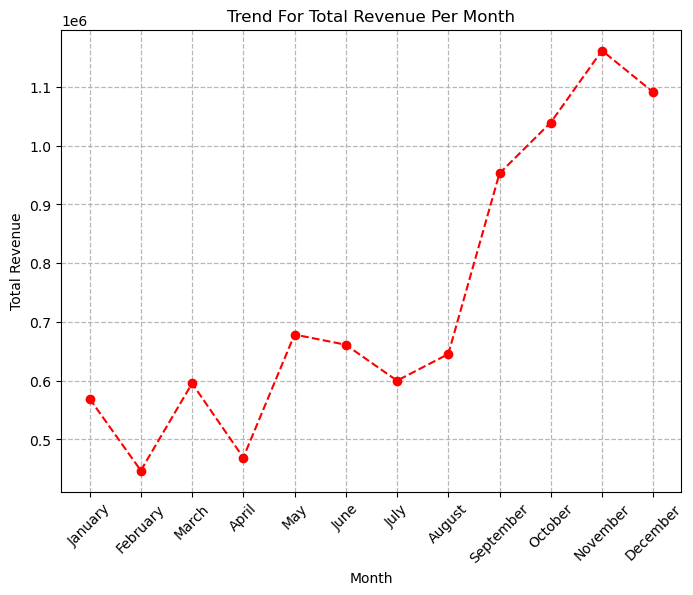

In [234]:
plt.figure(figsize=(8,6))
plt.plot(Total_revenue_per_Month["Month"],Total_revenue_per_Month["Revenue"], marker='o',linestyle='--',color='red' )
plt.title("Trend For Total Revenue Per Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True, which='both',linestyle='--',linewidth=0.9,alpha=0.9)
plt.xticks(rotation=45)
plt.savefig("month.png")

#### FROM THE GRAPH, THE MONTH AT WHICH THE HIGHEST SALE WAS MADE IS NOVEMBER

## CALCULATING THE TOTAL SALES MADE WEEKLY

In [235]:
Total_revenue_per_week = df2.groupby(["Month","Week"]).agg({"Revenue":"sum"}).reset_index()

In [236]:
Total_revenue_per_week.sort_values(by="Revenue",ascending=False).head(10)

,Month,Week,Revenue
11,December,49,622016.870
59,September,38,309569.211
51,October,40,297116.860
47,November,46,277773.940
46,November,45,264765.980
10,December,48,259009.970
53,October,42,255461.640
48,November,47,249532.680
54,October,43,237685.490
45,November,44,227580.200


In [237]:
df2["Week"].describe()

count     397924.0
mean     30.964629
std       14.75588
min            1.0
25%           19.0
50%           34.0
75%           44.0
max           51.0
Name: Week, dtype: Float64

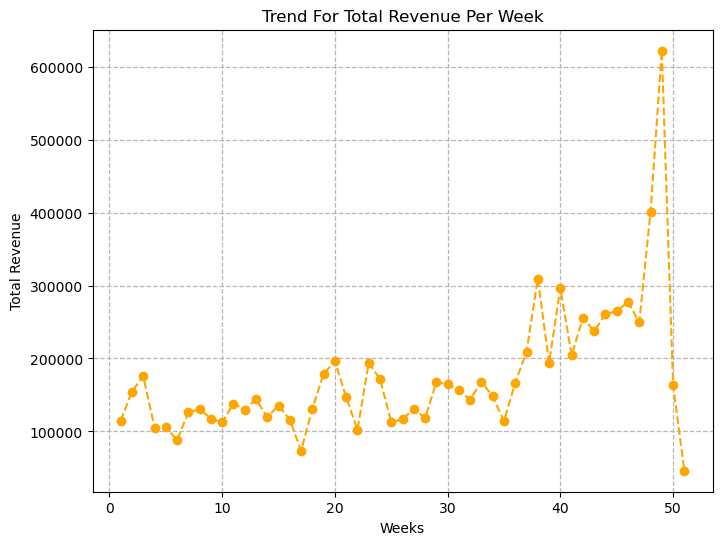

In [32]:
plt.figure(figsize=(8,6))
plt.plot(Total_revenue_per_week["Week"],Total_revenue_per_week["Revenue"], marker='o',linestyle='--',color='orange' )
plt.title("Trend For Total Revenue Per Week")
plt.xlabel("Weeks")
plt.ylabel("Total Revenue")
plt.grid(True, which='both',linestyle='--',linewidth=0.9,alpha=0.9)
plt.savefig("week.png")

#### FROM THE GRAPH, THE WEEK AT WHICH THE HIGHEST SALE WAS MADE IS WEEK 49


## CALCULATING THE TOTAL SALES MADE DAILY 

In [248]:
day_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

In [249]:
Total_revenue_per_day = df2.groupby("Day_Of_Week").agg({"Revenue":"sum"}).reset_index()

In [250]:
Total_revenue_per_day["Day_Of_Week"] = pd.Categorical(Total_revenue_per_day["Day_Of_Week"],categories=day_order,ordered=True)

In [251]:
Total_revenue_per_day.sort_values(by="Day_Of_Week", inplace=True)

In [252]:
Total_revenue_per_day.sort_values(by="Revenue", ascending=False)

,Day_Of_Week,Revenue
3,Thursday,1976859.070
4,Tuesday,1700634.631
5,Wednesday,1588336.170
0,Friday,1485917.401
1,Monday,1367146.411
2,Sunday,792514.221


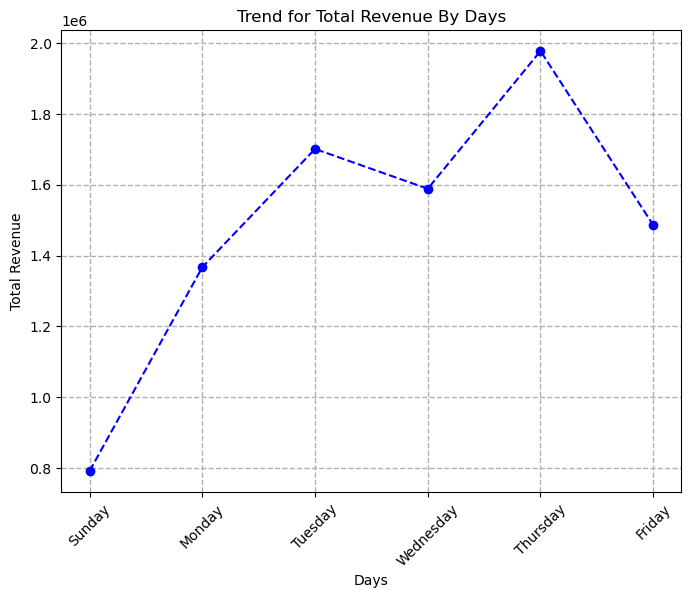

In [253]:
plt.figure(figsize=(8,6))
plt.plot(Total_revenue_per_day["Day_Of_Week"],Total_revenue_per_day["Revenue"], marker='o',linestyle='--',color='blue' )
plt.title("Trend for Total Revenue By Days")
plt.xlabel("Days")
plt.ylabel("Total Revenue")
plt.grid(True, which='both', linestyle='--', linewidth=1.0 ,alpha=1.0)
plt.xticks(rotation=45)
plt.savefig("day.png")

#### FROM THE GRAPH, THE DAY AT WHICH THE HIGHEST SALE WAS RECORDED IS THURSDAY


## CALCULATING THE TOTAL SALES MADE PER HOUR

In [36]:
Total_revenue_per_hour = df2.groupby("Hour").agg({"Revenue":"sum"}).reset_index()

In [37]:
Total_revenue_per_hour.sort_values(by="Revenue",ascending=False)

,Hour,Revenue
6,12,1378571.480
4,10,1261192.571
7,13,1173264.750
5,11,1104558.750
8,14,995629.371
9,15,966191.750
3,9,842605.171
10,16,468885.800
2,8,282115.630
11,17,234413.521


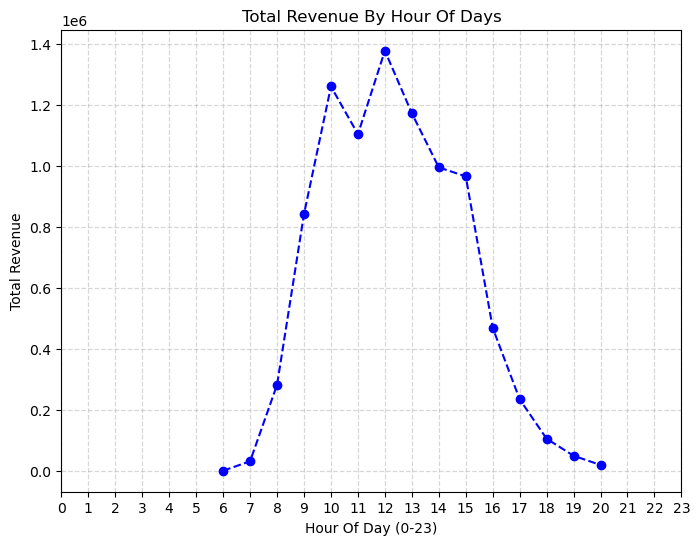

In [38]:
plt.figure(figsize=(8,6))
plt.plot(Total_revenue_per_hour["Hour"],Total_revenue_per_hour["Revenue"], marker='o',linestyle='--',color='blue' )
plt.title("Total Revenue By Hour Of Days")
plt.xlabel("Hour Of Day (0-23)")
plt.ylabel("Total Revenue")
plt.grid(True, which='both', linestyle='--', linewidth=0.9, alpha=0.5)
plt.xticks(range(0,24))
plt.savefig("hour.png")

#### FROM THE GRAPH, THE TIME AT WHICH THE  COMPANY RECORDED HIGH SALES ARE FROM 9AM TO 3PM


## TOTAL SALES MADE BY COUNTRY

In [39]:
Sales_by_country = df2.groupby("Country").agg({"Revenue":"sum"}).reset_index()

In [40]:
sales = Sales_by_country.sort_values(by="Revenue",ascending=False).head(10)
sales

,Country,Revenue
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


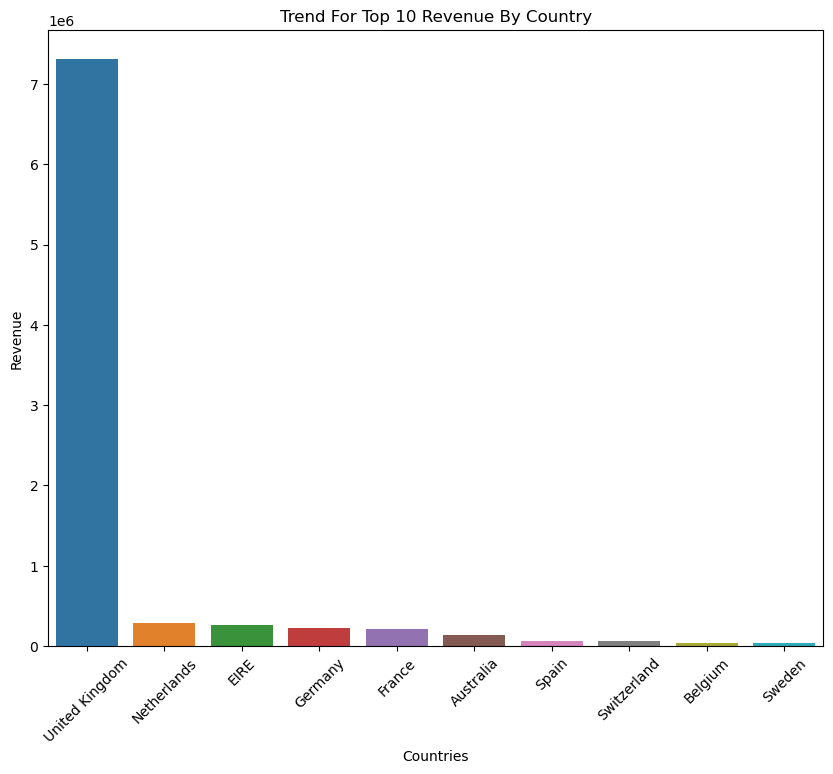

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(data=sales, x='Country', y='Revenue')
plt.title("Trend For Top 10 Revenue By Country")
plt.xlabel("Countries")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.savefig("revenue.png")
plt.show()

#### COUNTRIES WITH FREQUENT ORDERS

In [42]:
country_with_highest_order = df2.groupby("Country").agg({"InvoiceNo":"nunique","Quantity":"count"}).reset_index()

In [43]:
order = country_with_highest_order.rename(columns={"Quantity":"Num_of_Orders"}).sort_values(by="InvoiceNo",ascending=False).head(10)

In [44]:
order

,Country,InvoiceNo,Num_of_Orders
35,United Kingdom,16649,354345
14,Germany,457,9042
13,France,389,8342
10,EIRE,260,7238
3,Belgium,98,2031
23,Netherlands,95,2363
30,Spain,90,2485
0,Australia,57,1185
26,Portugal,57,1462
32,Switzerland,51,1842


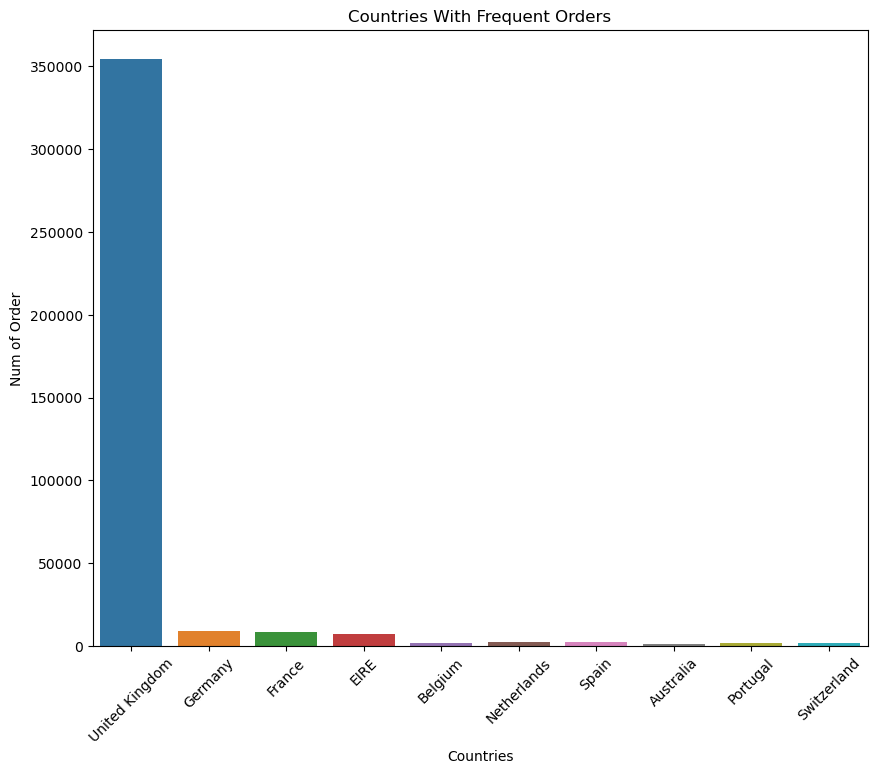

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(data=order, x="Country",y="Num_of_Orders")
plt.title("Countries With Frequent Orders")
plt.xlabel("Countries")
plt.ylabel("Num of Order")
plt.xticks(rotation=45)
plt.savefig("Country with orders")

## TOP 10 PRODUCTS BY FREQUENCY(OCCURENCE IN DATASET)

In [46]:
# top 10 most occuring product by count of quantity

x = df2.groupby("StockCode").agg({"Quantity":"count"}).reset_index()

In [47]:
x

,StockCode,Quantity
0,10002,49
1,10080,21
2,10120,30
3,10125,64
4,10133,124
...,...,...
3660,C2,133
3661,DOT,16
3662,M,290
3663,PADS,4


In [48]:
frequent_product = x.sort_values(by="Quantity",ascending=False).head(10)

In [49]:
frequent_product

,StockCode,Quantity
3349,85123A,2035
1218,22423,1724
3343,85099B,1618
2602,84879,1408
2406,47566,1397
100,20725,1317
1500,22720,1159
102,20727,1105
3664,POST,1099
1963,23203,1098


## TOP 10  MOST SOLD PRODUCTS (BY TOTAL QUANTITY)

In [50]:
most_sold_product = df2.groupby("StockCode").agg({"Quantity":"sum"}).reset_index()

In [51]:
most_sold=most_sold_product.sort_values(by="Quantity",ascending=False).head(10)

In [52]:
most_sold

,StockCode,Quantity
2329,23843,80995
1927,23166,77916
2499,84077,54415
1018,22197,49183
3343,85099B,46181
3349,85123A,36782
2602,84879,35362
353,21212,33693
1849,23084,27202
1282,22492,26076


## TOP 10 MOST SOLD PRODUCTS BY REVENUE

In [53]:
most_sold_by_revenue = df2.groupby("StockCode").agg({"Revenue":"sum","Quantity":"sum"}).reset_index()

In [54]:
most_sold_revenue = most_sold_by_revenue.sort_values(by="Revenue",ascending=False).head(10)
most_sold_revenue

,StockCode,Revenue,Quantity
2329,23843,168469.60,80995
1218,22423,142592.95,12412
3349,85123A,100603.50,36782
3343,85099B,85220.78,46181
1927,23166,81416.73,77916
3664,POST,77803.96,3120
2406,47566,68844.33,15295
2602,84879,56580.34,35362
3662,M,53779.93,7179
1849,23084,51346.20,27202


### FILTERING  AND MERGING THE TOP 10 PRODUCTS GROUPED BY OCCURRANCE, TOTAL QUANTITY, AND  TOTAL REVENUE TO KNOW WHY CUSTOMERS BOUGHT THEM MOST

#### IN ORDER TO ACHIEVE THIS, A UNITPRICE GROUP WAS CREATED USED TO TRACK THE CUSTOMER'S BEHAVIOUR 

In [55]:
df2["UnitPrice_Group"] = pd.qcut(df2["UnitPrice"], q=3, labels=["Low","Average","High"])

In [56]:
df2.groupby("UnitPrice_Group").count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Day_Of_Week,Hour,Revenue
UnitPrice_Group,,,,,,,,,,,,,,
Low,140759,140759,140759,140759,140759,140759,140759,140759,140759,140759,140759,140759,140759,140759
Average,148399,148399,148399,148399,148399,148399,148399,148399,148399,148399,148399,148399,148399,148399
High,108766,108766,108766,108766,108766,108766,108766,108766,108766,108766,108766,108766,108766,108766


In [57]:
Low_price_group = df2[df2["UnitPrice_Group"]=="Low"]

In [58]:
Low_price_group.count()

InvoiceNo          140759
StockCode          140759
Description        140759
Quantity           140759
InvoiceDate        140759
UnitPrice          140759
CustomerID         140759
Country            140759
Year               140759
Month              140759
Week               140759
Day_Of_Week        140759
Hour               140759
Revenue            140759
UnitPrice_Group    140759
dtype: int64

In [59]:
Avg_price_group = df2[df2["UnitPrice_Group"]=="Average"]

In [60]:
Avg_price_group.count()

InvoiceNo          148399
StockCode          148399
Description        148399
Quantity           148399
InvoiceDate        148399
UnitPrice          148399
CustomerID         148399
Country            148399
Year               148399
Month              148399
Week               148399
Day_Of_Week        148399
Hour               148399
Revenue            148399
UnitPrice_Group    148399
dtype: int64

In [61]:
High_price_group = df2[df2["UnitPrice_Group"]=="High"]

In [62]:
High_price_group.count()

InvoiceNo          108766
StockCode          108766
Description        108766
Quantity           108766
InvoiceDate        108766
UnitPrice          108766
CustomerID         108766
Country            108766
Year               108766
Month              108766
Week               108766
Day_Of_Week        108766
Hour               108766
Revenue            108766
UnitPrice_Group    108766
dtype: int64

## MERGING THE PRICE GROUP ON TOP 10 PRODUCT

### 1. ANALYSING THE TOP 10 FREQUENT PRODUCTS BY PRICE GROUP

#### 1A. FILTERING THE TOP 10 FREQUENT (OCCURING) PRODUCTS THAT FALLS UNDER LOW PRICE GROUP


THIS WAS USED TO ASCERTAIN LOW PRICE PRODUCTS THAT APPEARED IN TOP 10 OCCURING PRODUCTS

In [63]:
Low_price_products = Low_price_group.groupby("StockCode")["Quantity"].count().reset_index()

In [64]:
LPP = Low_price_products.sort_values(by="Quantity", ascending=False).head(10)
LPP

,StockCode,Quantity
198,21212,1068
553,22197,1057
133,21034,952
926,22993,877
151,21080,753
66,20724,743
368,21790,726
1313,84991,691
437,21977,686
1305,84946,682


#### MERGING (TOP 10 LOW PRICE PRODUCTS + TOP 10 MOST FREQUENT PRODUCTS)


AFTER ANALYSING, IT WAS OBSERVED THAT LOW PRICE PRODUCT DID NOT APPEAR IN THE TOP 10 OCCURING PRODUCTS

In [65]:
most_frequent = frequent_product

In [66]:
most_frequent

,StockCode,Quantity
3349,85123A,2035
1218,22423,1724
3343,85099B,1618
2602,84879,1408
2406,47566,1397
100,20725,1317
1500,22720,1159
102,20727,1105
3664,POST,1099
1963,23203,1098


In [67]:
LPP

,StockCode,Quantity
198,21212,1068
553,22197,1057
133,21034,952
926,22993,877
151,21080,753
66,20724,743
368,21790,726
1313,84991,691
437,21977,686
1305,84946,682


In [68]:
LPP1 = LPP
LPP1

,StockCode,Quantity
198,21212,1068
553,22197,1057
133,21034,952
926,22993,877
151,21080,753
66,20724,743
368,21790,726
1313,84991,691
437,21977,686
1305,84946,682


In [69]:
most_frequent.merge(LPP1, on="StockCode")

,StockCode,Quantity_x,Quantity_y


#### 1B. FILTERING THE TOP 10 FREQUENT (OCCURING) PRODUCTS THAT FALLS UNDER AVERAGE PRICE GROUP


In [70]:
Avg_price_products = Avg_price_group.groupby("StockCode").agg({"Quantity":"count"})

In [71]:
APP = Avg_price_products.reset_index().sort_values(by="Quantity",ascending=False).head(10)

In [72]:
APP

,StockCode,Quantity
1588,85123A,2017
1582,85099B,1613
1265,84879,1408
42,20725,1307
44,20727,1105
1007,23203,1098
611,22383,1080
1012,23209,1028
453,22086,1005
610,22382,1004


In [73]:
APP1 = APP
APP1

,StockCode,Quantity
1588,85123A,2017
1582,85099B,1613
1265,84879,1408
42,20725,1307
44,20727,1105
1007,23203,1098
611,22383,1080
1012,23209,1028
453,22086,1005
610,22382,1004


#### MERGING (TOP 10 AVERAGE PRICE PRODUCTS + TOP 10 MOST FREQUENT PRODUCTS)

6 AVERAGE PRICE PRODUCTS WERE FOUND AFTER MERGING.   


In [74]:
most_frequent.merge(APP1,on="StockCode")

,StockCode,Quantity_x,Quantity_y
0,85123A,2035,2017
1,85099B,1618,1613
2,84879,1408,1408
3,20725,1317,1307
4,20727,1105,1105
5,23203,1098,1098


#### 1C. FILTERING THE TOP 10 FREQUENT (OCCURING) PRODUCTS THAT FALLS UNDER HIGH PRICE GROUP

In [75]:
High_price_products = High_price_group.groupby("StockCode").agg({"Quantity":"count"})

In [76]:
HPP = High_price_products.reset_index().sort_values(by="Quantity",ascending=False).head(10)

In [77]:
HPP

,StockCode,Quantity
451,22423,1723
1024,47566,1396
587,22720,1159
1547,POST,1093
889,23298,1024
593,22727,899
720,22960,886
331,22138,867
332,22139,833
592,22726,808


In [78]:
HPP1 = HPP
HPP1

,StockCode,Quantity
451,22423,1723
1024,47566,1396
587,22720,1159
1547,POST,1093
889,23298,1024
593,22727,899
720,22960,886
331,22138,867
332,22139,833
592,22726,808


#### MERGING (TOP 10 HIGH PRICE PRODUCTS + TOP 10 MOST FREQUENT PRODUCTS)
4 PRODUCTS THAT FELL UNDER THE HIGH PRICE GROUP WERE FOUND AFTER MERGING.

In [79]:
# MERGING

most_frequent.merge(HPP1,on="StockCode")

,StockCode,Quantity_x,Quantity_y
0,22423,1724,1723
1,47566,1397,1396
2,22720,1159,1159
3,POST,1099,1093


FROM THE ANALYSIS, TOP MOST OCCCURING PRODUCTS FELL UNDER PRODUCTS WITH AVERAGE PRICE GROUP
THERE ARE NO LOW PRICE PRODUCT SOLD.
THIS MEAN THAT PRODUCTS WITH LOW PRICE RANGE DID NOT OCCUR FREQUENTLY AS THE TOP 10 SALES RECORD.

### 2. ANALYSING THE TOP 10 MOST SOLD PRODUCTS (TOTAL QUANTITY) BY PRICE GROUP

#### 2A. FILTERING THE TOP 10 MOST SOLD PRODUCTS (TOTAL QUANTITY) THAT FALLS UNDER LOW PRICE GROUP

In [80]:
Low_price_sold_product = Low_price_group.groupby("StockCode").agg({"Quantity":"sum"}).reset_index()

In [81]:
LPSP = Low_price_sold_product.sort_values(by="Quantity",ascending=False).head(10)

In [82]:
LPSP

,StockCode,Quantity
983,23166,77916
1258,84077,54415
553,22197,49031
198,21212,33693
689,22492,26068
764,22616,25345
437,21977,24264
36,17003,22963
8,15036,21876
418,21915,20891


In [83]:
# REASSIGN THE VARIABLES FOR ACURATE MERGING

LPSP1 = LPSP

In [84]:
LPSP1

,StockCode,Quantity
983,23166,77916
1258,84077,54415
553,22197,49031
198,21212,33693
689,22492,26068
764,22616,25345
437,21977,24264
36,17003,22963
8,15036,21876
418,21915,20891


#### MERGING (TOP 10 LOW PRICE PRODUCTS + TOP 10 MOST SOLD PRODUCTS)

AFTER MERGING, 5 PRODUCTS UNDER THE LOW PRICE GROUP WERE FOUND IN THE MOST SOLD PRODUCT.

In [85]:
most_sold.merge(LPSP1,on="StockCode")

,StockCode,Quantity_x,Quantity_y
0,23166,77916,77916
1,84077,54415,54415
2,22197,49183,49031
3,21212,33693,33693
4,22492,26076,26068


#### 2B. FILTERING THE TOP 10 MOST SOLD PRODUCTS (TOTAL QUANTITY) THAT FALLS UNDER AVERAGE PRICE GROUP


In [86]:
Avg_price_sold_product = Avg_price_group.groupby("StockCode").agg({"Quantity":"sum"}).reset_index()

In [87]:
APSP = Avg_price_sold_product.sort_values(by="Quantity", ascending=False).head(10)
APSP

,StockCode,Quantity
1155,23843,80995
1582,85099B,46175
1265,84879,35362
1588,85123A,32654
955,23084,26929
614,22386,20164
1007,23203,19516
42,20725,17867
1584,85099F,16804
659,22469,16514


In [88]:
# reassigning variables

APSP1 = APSP
APSP1

,StockCode,Quantity
1155,23843,80995
1582,85099B,46175
1265,84879,35362
1588,85123A,32654
955,23084,26929
614,22386,20164
1007,23203,19516
42,20725,17867
1584,85099F,16804
659,22469,16514


#### MERGING (TOP 10 AVERAGE PRICE PRODUCTS + TOP 10 MOST SOLD PRODUCTS)
AFTER MERGING, 5 PRODUCTS WITH AVERAGE PRICE WERE PURCHASED MORE BY THE CUSTOMERS (APPEARED IN TOP 10 MOST SOLD BY QUANTITY)



In [89]:
most_sold.merge(APSP1,on="StockCode")

,StockCode,Quantity_x,Quantity_y
0,23843,80995,80995
1,85099B,46181,46175
2,85123A,36782,32654
3,84879,35362,35362
4,23084,27202,26929


#### 2C. FILTERING THE TOP 10 MOST SOLD PRODUCTS (TOTAL QUANTITY) THAT FALLS UNDER HIGH PRICE GROUP

In [90]:
High_price_sold_product = High_price_group.groupby("StockCode").agg({"Quantity":"sum"}).reset_index()

In [91]:
HPSP = High_price_sold_product.sort_values(by="Quantity", ascending=False).head(10)
HPSP

,StockCode,Quantity
1024,47566,15291
451,22423,12402
101,21137,11406
1045,79321,9650
720,22960,8067
889,23298,7785
593,22727,7221
587,22720,7020
1049,82484,5921
877,23245,5856


In [92]:
HPSP1 = HPSP
HPSP1

,StockCode,Quantity
1024,47566,15291
451,22423,12402
101,21137,11406
1045,79321,9650
720,22960,8067
889,23298,7785
593,22727,7221
587,22720,7020
1049,82484,5921
877,23245,5856


#### MERGING (TOP 10 HIGH PRICE PRODUCTS + TOP 10 MOST SOLD PRODUCTS)

AFTER MERGING, NO HIGH PRICE PRODUCT WAS FOUND IN THE TOP MOST SOLD PRODUCTS 

In [93]:
most_sold.merge(HPSP1,on="StockCode")

,StockCode,Quantity_x,Quantity_y


THIS ANALYSIS SHOWWED THAT THE PRICE PF PRODUCTS INFLUENCED THE CUSTOMERS PURCHASE

### 3. ANALYSING THE TOP 10 MOST SOLD PRODUCTS BY REVENUE


#### 3A. FILTERING THE TOP 10 MOST SOLD PRODUCTS (TOTAL REVENUE) THAT FALLS UNDER LOW PRICE GROUP

In [94]:
Low_price_product_revenue = Low_price_group.groupby("StockCode").agg({"Revenue":"sum"}).reset_index()

In [95]:
LPPR = Low_price_product_revenue.sort_values(by="Revenue",ascending=False).head(10)

In [96]:
LPPR

,StockCode,Revenue
983,23166,81416.73
553,22197,36978.67
418,21915,23587.29
547,22178,19804.95
1305,84946,18951.60
800,22693,17226.20
198,21212,16394.53
8,15036,16044.44
689,22492,16026.20
1258,84077,13586.25


In [97]:
LPPR1 =LPPR
LPPR1

,StockCode,Revenue
983,23166,81416.73
553,22197,36978.67
418,21915,23587.29
547,22178,19804.95
1305,84946,18951.60
800,22693,17226.20
198,21212,16394.53
8,15036,16044.44
689,22492,16026.20
1258,84077,13586.25


#### MERGING (TOP 10 LOW PRICE PRODUCTS + TOP 10 MOST SOLD PRODUCTS BY REVENUE)

AFTER MERGING, ONLY 1 LOW PRICE PRODUCT WAS FOUND IN THE TOP MOST SOLD PRODUCTS

In [98]:
most_sold_revenue1 = most_sold_revenue
most_sold_revenue1

,StockCode,Revenue,Quantity
2329,23843,168469.60,80995
1218,22423,142592.95,12412
3349,85123A,100603.50,36782
3343,85099B,85220.78,46181
1927,23166,81416.73,77916
3664,POST,77803.96,3120
2406,47566,68844.33,15295
2602,84879,56580.34,35362
3662,M,53779.93,7179
1849,23084,51346.20,27202


In [99]:
most_sold_revenue1.merge(LPPR1, on="StockCode")

,StockCode,Revenue_x,Quantity,Revenue_y
0,23166,81416.73,77916,81416.73


#### 3B. FILTERING THE TOP 10 MOST SOLD PRODUCTS (TOTAL REVENUE) THAT FALLS UNDER AVERAGE PRICE GROUP

In [100]:
Avg_price_product_revenue = Avg_price_group.groupby("StockCode").agg({"Revenue":"sum"}).reset_index()

In [101]:
APPR = Avg_price_product_revenue.sort_values(by="Revenue",ascending=False).head(10)

In [102]:
APPR

,StockCode,Revenue
1155,23843,168469.60
1588,85123A,87268.60
1582,85099B,85196.00
1265,84879,56580.34
955,23084,50218.71
453,22086,41751.80
1007,23203,37684.38
614,22386,37285.46
1584,85099F,30631.81
42,20725,28214.55


In [103]:
APPR1 = APPR
APPR1

,StockCode,Revenue
1155,23843,168469.60
1588,85123A,87268.60
1582,85099B,85196.00
1265,84879,56580.34
955,23084,50218.71
453,22086,41751.80
1007,23203,37684.38
614,22386,37285.46
1584,85099F,30631.81
42,20725,28214.55


#### MERGING (TOP 10 AVERAGE PRICE PRODUCTS + TOP 10 MOST SOLD PRODUCTS BY REVENUE)

AFTER MERGING,5 AVEARGE PRICE PRODUCT WAS FOUND IN THE TOP MOST SOLD PRODUCTS

In [104]:
most_sold_revenue1.merge(APPR1, on='StockCode')

,StockCode,Revenue_x,Quantity,Revenue_y
0,23843,168469.60,80995,168469.60
1,85123A,100603.50,36782,87268.60
2,85099B,85220.78,46181,85196.00
3,84879,56580.34,35362,56580.34
4,23084,51346.20,27202,50218.71


#### 3C. FILTERING THE TOP 10 MOST SOLD PRODUCTS (TOTAL REVENUE) THAT FALLS UNDER HIGH PRICE GROUP

In [105]:
High_price_product_revenue = High_price_group.groupby("StockCode").agg({"Revenue":"sum"}).reset_index()

In [106]:
HPPR = High_price_product_revenue.sort_values(by="Revenue",ascending=False).head(10)

In [107]:
HPPR

,StockCode,Revenue
451,22423,142592.95
1547,POST,77789.04
1024,47566,68844.33
1546,M,50442.45
498,22502,47364.20
1045,79321,46286.51
101,21137,39064.55
889,23298,36173.95
888,23284,35913.85
1049,82484,34478.01


In [108]:
HPPR1 = HPPR
HPPR1

,StockCode,Revenue
451,22423,142592.95
1547,POST,77789.04
1024,47566,68844.33
1546,M,50442.45
498,22502,47364.20
1045,79321,46286.51
101,21137,39064.55
889,23298,36173.95
888,23284,35913.85
1049,82484,34478.01


#### MERGING (TOP 10 HIGH PRICE PRODUCTS + TOP 10 MOST SOLD PRODUCTS BY REVENUE)

AFTER MERGING, 4 HIGH PRICE PRODUCT WAS FOUND IN THE TOP MOST SOLD PRODUCTS

In [109]:
most_sold_revenue1.merge(HPPR1,on="StockCode")

,StockCode,Revenue_x,Quantity,Revenue_y
0,22423,142592.95,12412,142592.95
1,POST,77803.96,3120,77789.04
2,47566,68844.33,15295,68844.33
3,M,53779.93,7179,50442.45


## ANALYZING THE CUSTOMERS BEHAVIOUR BASED ON THEIR LOYALTY

In [110]:
# THIS SHOWS HOW MANY INVOICES A CUSTOMER HAS IN THE RECORD 

Total_customers = df2.groupby(["CustomerID","Country"]).agg({"InvoiceNo":"nunique","Quantity":"sum"}).reset_index()

In [111]:
Total_customers.sort_values(by="InvoiceNo",ascending=False).head(10)

,CustomerID,Country,InvoiceNo,Quantity
334,12748.0,United Kingdom,210,25748
1888,14911.0,EIRE,201,80515
4019,17841.0,United Kingdom,124,23071
570,13089.0,United Kingdom,97,31070
1670,14606.0,United Kingdom,93,6224
2185,15311.0,United Kingdom,91,38194
489,12971.0,United Kingdom,86,9289
1698,14646.0,Netherlands,74,197491
2711,16029.0,United Kingdom,63,40208
804,13408.0,United Kingdom,62,16232


#### GROUPING THE CUSTOMER'S INTO LOYALTY STATUS GROUP BY THE NUMBER OF INVOICES EACH CUSTOMER MADE 

THE CUSTOMERS WERE GROUPED INTO 3 SECTIONS:

1. LAPSED: THESE CUSTOMERS PURCHASED PRODUCTS ONLY ONCE (1 INVOICE)

2. RETURNING: THE MADE PURCHASE UP TO 10 TIMES (2-10 INVOICES)

3. LOYAL: THEY MADE PURCHASE MORE THAN 10 TIMES

In [112]:
Total_customers.describe()

,CustomerID,InvoiceNo,Quantity
count,4347.000000,4347.000000,4347.000000
mean,15294.640212,4.264090,1192.016563
std,1724.722441,7.698752,5051.072646
min,12346.000000,1.000000,1.000000
25%,13806.500000,1.000000,160.000000
50%,15292.000000,2.000000,379.000000
75%,16776.500000,5.000000,991.500000
max,18287.000000,210.000000,197491.000000


In [113]:
bin = [0,1,220]
label=["Lapsed","Loyal"]
Total_customers["Loyalty_Status"] =pd.cut(Total_customers["InvoiceNo"],bins = bin,labels=label) 

In [114]:
TS=Total_customers.sort_values(by="InvoiceNo", ascending=False).head(10)
TS

,CustomerID,Country,InvoiceNo,Quantity,Loyalty_Status
334,12748.0,United Kingdom,210,25748,Loyal
1888,14911.0,EIRE,201,80515,Loyal
4019,17841.0,United Kingdom,124,23071,Loyal
570,13089.0,United Kingdom,97,31070,Loyal
1670,14606.0,United Kingdom,93,6224,Loyal
2185,15311.0,United Kingdom,91,38194,Loyal
489,12971.0,United Kingdom,86,9289,Loyal
1698,14646.0,Netherlands,74,197491,Loyal
2711,16029.0,United Kingdom,63,40208,Loyal
804,13408.0,United Kingdom,62,16232,Loyal


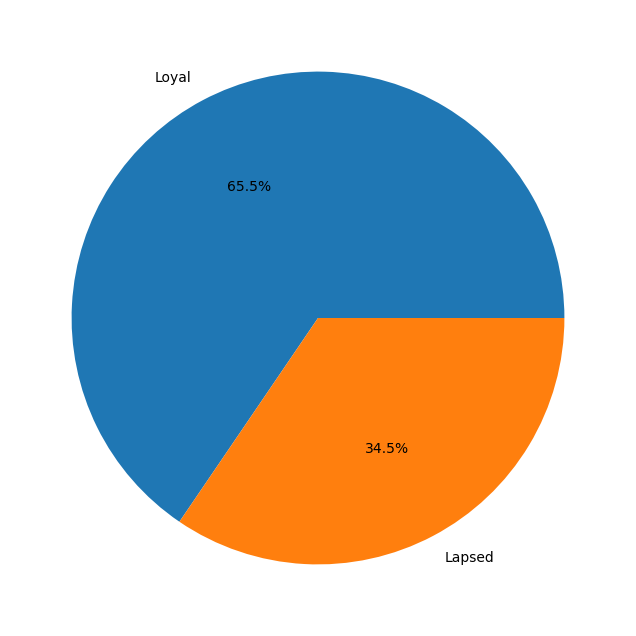

In [115]:
loyalty = Total_customers["Loyalty_Status"].value_counts()
plt.figure(figsize=(10,8))
plt.pie(loyalty,labels=loyalty.index,autopct='%1.1f%%')
plt.savefig("Loyal customers.png")

## ANALYSING CUSTOMER'S BEHAVIOUR BASED ON RFM

RFM MEANS RECENCY, FREQUENCY AND MONETARY

THIS ANALYSIS IS TO FIND OUT CUSTOMER'S RECENT PURCHASE DATE (RECENCY), THE FREQUENCY AT WHICH THE CUSTOMERS PURCHASED AND HOW MUCH THE CUSTOMER SPENT

### A. CALCULATING RECENCY TO KNOW THE CUSTOMER'S LAST PURCHASE

In [116]:
df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"]) # CONERTS THE INVOICE DATE TO DATETIME

In [117]:
reference_date = df2["InvoiceDate"].max() + pd.Timedelta(days=1)

In [118]:
recency_df = df2.groupby("CustomerID").agg({"InvoiceDate":"max",
                                           "InvoiceNo":"nunique"})

In [119]:
recency_df.rename(columns={"InvoiceDate":"LastPurchaseDate"},inplace=True)

In [120]:
recency_df

,LastPurchaseDate,InvoiceNo
CustomerID,,
12346.0,2011-01-18 10:01:00,1
12347.0,2011-12-07 15:52:00,7
12348.0,2011-09-25 13:13:00,4
12349.0,2011-11-21 09:51:00,1
12350.0,2011-02-02 16:01:00,1
...,...,...
18280.0,2011-03-07 09:52:00,1
18281.0,2011-06-12 10:53:00,1
18282.0,2011-12-02 11:43:00,2


In [121]:
recency_df['Recency'] = (reference_date - recency_df['LastPurchaseDate']).dt.days

In [122]:
recency_df.reset_index().sort_values(by="InvoiceNo",ascending=False).head(10)

,CustomerID,LastPurchaseDate,InvoiceNo,Recency
326,12748.0,2011-12-09 12:20:00,210,1
1880,14911.0,2011-12-08 15:54:00,201,1
4011,17841.0,2011-12-08 12:07:00,124,2
562,13089.0,2011-12-07 09:02:00,97,3
1662,14606.0,2011-12-08 19:28:00,93,1
2177,15311.0,2011-12-09 12:00:00,91,1
481,12971.0,2011-12-06 12:20:00,86,4
1690,14646.0,2011-12-08 12:12:00,74,2
2703,16029.0,2011-11-01 10:27:00,63,39
796,13408.0,2011-12-08 09:05:00,62,2


In [123]:
recency_df['Recency'].describe()

count    4339.000000
mean       92.518322
std       100.009747
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Recency, dtype: float64

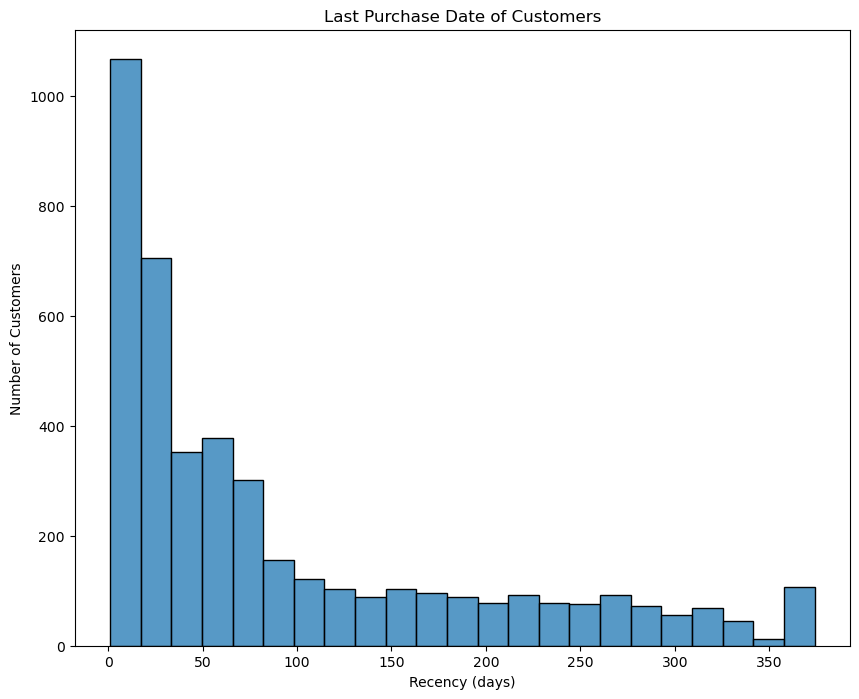

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize=(10,8))
sns.histplot(recency_df['Recency'], bins=23,edgecolor='black')
plt.title('Last Purchase Date of Customers')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.show()
plt.savefig("x.png")

### CALCULATING FREQUENCY OF CUSTOMERS ORDER BY:

#### 1. THE NUMBER OF TIMES ORDERED

In [125]:
# THE NUMBER OF TIMES THE TOP CUSTOMERS ORDERED 

frequent_customers_and_country = df2.groupby(["CustomerID","Country",]).agg({"InvoiceNo":"nunique","Quantity":"sum"}).reset_index()

In [126]:
frequent_customers_and_country.rename(columns={"InvoiceNo":"Frequency"}).sort_values(by="Frequency", ascending=False).head(10)

,CustomerID,Country,Frequency,Quantity
334,12748.0,United Kingdom,210,25748
1888,14911.0,EIRE,201,80515
4019,17841.0,United Kingdom,124,23071
570,13089.0,United Kingdom,97,31070
1670,14606.0,United Kingdom,93,6224
2185,15311.0,United Kingdom,91,38194
489,12971.0,United Kingdom,86,9289
1698,14646.0,Netherlands,74,197491
2711,16029.0,United Kingdom,63,40208
804,13408.0,United Kingdom,62,16232


#### 2. THE TOTAL QUANTITY ORDERED

In [127]:
# HIGHEST PURCHASING CUSTOMERS BASED ON NUMBER OF PRODUCTS PURCHASED ()

Highest_customer_by_freq_product = df2.groupby(["CustomerID","Country"]).agg({"InvoiceNo":"nunique","Quantity":"sum"}).reset_index()

In [128]:
Highest_customer_by_freq_product.sort_values(by="Quantity",ascending=False).head(10)

,CustomerID,Country,InvoiceNo,Quantity
1698,14646.0,Netherlands,74,197491
3017,16446.0,United Kingdom,2,80997
1888,14911.0,EIRE,201,80515
57,12415.0,Australia,21,77670
0,12346.0,United Kingdom,1,74215
3737,17450.0,United Kingdom,46,69993
3780,17511.0,United Kingdom,31,64549
4210,18102.0,United Kingdom,60,64124
1005,13694.0,United Kingdom,50,63312
1443,14298.0,United Kingdom,44,58343


IT WAS OBSERVED AFTER THIS ANALYSIS THAT SOME CUSTOMERS MADE MORE ORDERS BUT BOUGHT LESS QUANTITY OF PRODUCTS WHILE SOME ORDERED LESSER BUT BOUGHT PRODUCTS IN LARGE QUANTITES 

### CALCULATING MONETARY ASPECT OF THE CUSTOMERS

In [129]:
# HIGHEST PURCHASING CUSTOMERS BASED ON  TOTAL MONEY SPENT

Highest_customer_by_revenue = df2.groupby(["CustomerID","Country"]).agg({"Quantity":"sum","Revenue":"sum"}).reset_index()

In [130]:
Highest_customer_by_revenue.rename(columns={"Revenue":"Customer's_Expenses"}).sort_values(by="Customer's_Expenses",ascending=False).head(10)


,CustomerID,Country,Quantity,Customer's_Expenses
1698,14646.0,Netherlands,197491,280206.02
4210,18102.0,United Kingdom,64124,259657.30
3737,17450.0,United Kingdom,69993,194550.79
3017,16446.0,United Kingdom,80997,168472.50
1888,14911.0,EIRE,80515,143825.06
57,12415.0,Australia,77670,124914.53
1342,14156.0,EIRE,57885,117379.63
3780,17511.0,United Kingdom,64549,91062.38
2711,16029.0,United Kingdom,40208,81024.84
0,12346.0,United Kingdom,74215,77183.60


##  CALCULATING THE AVERAGE BASKET SIZE OF THE SALES 

In [131]:
Basket_size = df2.groupby("InvoiceNo").agg({"Quantity":"sum"}).reset_index()

In [132]:
Basket_size.sort_values(by="Quantity",ascending=False).head(10)

,InvoiceNo,Quantity
18503,581483,80995
1909,541431,74215
8112,556917,15049
10612,563076,14730
14371,572035,13392
12419,567423,12572
17360,578841,12540
6437,552883,12266
10843,563614,12196
10344,562439,11848


In [133]:
Avg_basket_size = Basket_size["Quantity"].mean()

In [134]:
Avg_basket_size

279.5476909797151

### USING THE AVERAGE BASKET SIZE TO KNOW PRODUCTS PURCHASED MORE

#### 1. PRODUCTS WITH BASKET SIZE (ORDER) LESSER THAN THE AVERAGE BASKET SIZE

In [135]:
orders_less_than_avg_basket_size = Basket_size[Basket_size["Quantity"]<=Avg_basket_size]

In [136]:
orders_less_than_avg_basket_size.count()

InvoiceNo    13650
Quantity     13650
dtype: int64

#### 2. PRODUCTS WITH BASKET SIZE (ORDER) GREATER THAN THE AVERAGE BASKET SIZE


In [137]:
orders_higher_than_avg_basket_size = Basket_size[Basket_size["Quantity"]>=Avg_basket_size]

In [138]:
orders_higher_than_avg_basket_size.count()

InvoiceNo    4886
Quantity     4886
dtype: int64

THE PRODUCTS WITH THEIR BASKEST SIZE (ORDER) LESSER THAN THE AVERAGE BASKET SIZE WERE PURCHASED MORE.
THIS SIGNIFIES THAT MOST TRANSACTIONS ARE SMALL ORDER PURCHASES.

#                                                  SUMMARY OF ANALYSIS

DURING THE COURSE OF THIS ANALYSIS, LOT OF FACTORS WERE USED TO ANALYSE THE CUSTOMERS' BEHAVIOUR FOR THE SALES RECORD. THE ANALYSIS ROADMAP IS AS FOLLOWS:

1. TOTAL SALES WERE ANALYSED BY CALCULATING SALES MADE BY:
   - COUNTRY(UNITED KINGDOM WAS RECORDED WITH THE HIGHEST SALE AND FREQUENT ORDERS)
   - MONTH(NOVEMBER IS THE MONTH WITH HIGHEST SALE)
   - WEEK(WEEK 49 IS THE WEEK WITH HIGHEST SALE)
   - DAY(THURSDAYS ARE THE DAYS AT WHICH HIGH SALES OCCUR)
   - HOURS(HIGHEST SALES ARE RECORDED BETWEEN THE HOURS OF 9AM-3PM)

2. THE TOP 10 PRODUCTS WERE ALSO ANALYSED THROUGH CALCULATING:
   - FREQUENTLY ORDERED PRODUCTS
   - MOST SOLD PRODUCTS BY THE TOTAL QUANTITY ORDERED
   - MOST SOLD PRODUCTS BY THE TOTAL SALES MADE

3. UNIT PRICE GROUP WAS ALSO CREATED TO ANALYSED THE TOP PRODUCTS THAT WERE MOSTLY PURCHASED BASED ON PRICE.
   THE GROUPS ARE LOW_PRICE_GROUP, AVERAGE_PRICE_GROUP AND HIGH_PRICE_GROUP RESPECTIVELY.

   - IN THE LOW_PRICE_GROUP, TOP PRODUCTS FOUND ARE;
       * TOP 10 FREQUENTLY ORDERED = 0 PRODUCT
       * TOP 10 MOST SOLD BY QUANTITY = 5 PRODUCTS
       * TOP 10 MOST SOLD BY TOTAL SALES = 1 PRODUCT


   - IN THE AVERAGE_PRICE_GROUP, TOP PRODUCTS FOUND ARE;
       * TOP 10 FREQUENTLY ORDERED = 6 PRODUCTS
       * TOP 10 MOST SOLD BY QUANTITY = 5 PRODUCTS
       * TOP 10 MOST SOLD BY TOTAL SALES = 5 PRODUCTS


   - IN THE HIGH_PRICE_GROUP, TOP PRODUCTS FOUND ARE;
       * TOP 10 FREQUENTLY ORDERED = 4 PRODUCTS
       * TOP 10 MOST SOLD BY QUANTITY = 0 PRODUCT
       * TOP 10 MOST SOLD BY TOTAL SALES = 4 PRODUCTS


4. CUSTOMER'S LOYALTY TO THE BUSINES WAS ALSO CALCULATED USING THE NUMBER OF INVOICES THEY MADE
   - LOYAL CUSTOMERS ARE THOSE THAT HAVE MORE THAN ONE(1) INVOICE RECORD
   - LAPSED CUSTOMERS ARE THOSE CUSTOMERS THAT MADE PURCHASE ONLY ONCE

5. THE RECENCY,FREQUENCY, AND MONETARY ASPECT (RFM) OF CUSTOMERS WAS ALSO ANALYZED.

6. THE AVERAGE BASKET MEAN OF THE RECORD WAS ANALYZED.

# CONCLUSION

#### THE ANALYSIS SHOWED THAT:

- MOST COUNTRIES HAVE LOW ORDERS.

- THE MONTHS WITH MAXIMUM SALES RANGES FROM SEPTEMBER TO DECEMBER, BUT THE MONTH WITH THE HIGHEST SALES IS NOVEMBER.

- THE TIME WHEN  HIGH SALES WERE RECORDED ARE DURING THE HOURS OF 9AM TO 3PM DAILY.

- MOST OF THE PRODUCTS THAT CUSTOMERS PURCHASED ARE PRODUCTS WITH LOWER PRICES.

- THE NUMBER OF CUSTOMERS THAT STAYED LONGER BEFORE RE-ORDERING IS GREATER THAN THOSE THAT ORDER FREQUENTLY
  
- I ALSO OBSERVED THAT MAJORITY OF THE ORDERS BY BASKET SIZE ARE ABOVE THE AVERAGE BASKET SIZE (13652), WHILE THE REST FALL UNDER THE AVERAGE BASKET SIZE (4884).

   


# STRATEGIES TO IMPROVE BUSINESS

1. TAILOR PROMOTIONS FOR COUNTRIES WITH LOW ORDERS
   - You can align promo with local holiday (christmas, Eid-Mubarak, Local cultural events, etc) of the countries with low orders. People respond more to offers that fit their context.Example:
     * Ramadan bundle deals (Middle East).
     * Diwali gift bundles (India).
     * Free delivery during Singles’ Day (China).
       
   - Make provisions for customers to return the products within a given period of time if the product is not up to their expectation.
   - Add reviews from customers of the country and within.
   - Collaborate with some known influencers in the country to advertise your products.
   - Use local social media (e.g., Facebook is huge in some countries, WhatsApp or LINE in others).
   - Run a location-targeted promo. For example, if you are from Lebanon, you can use a code (LEBANON10) and get a 10% discount on your purchase.
      
2. SEND A REMINDER TO CUSTOMERS WHO HASN'T ORDERED IN A WHILE
   - You can send an email monthly to customers who has not ordered in a while.
   - Also offer a return discount on the regular item they purchases.
     
3. ENSURE FAST-MOVING ITEMS ARE CONSISTENTLY STOCKED.
   - Know the products that your customers purchases more and ensure they are always available.
   - You can also make available products that have similar qualities. Example, A coffee company that starts with just ground coffee might later offer coffee pods, cold brew bottles, and flavored beans — all similar but appealing to different customer needs, driving more growth. 

4. OFFER LOW-RISK INCENTIVES TO CUSTOMERS
   -  Group small items to boost values: You can group several small, inexpensive items together and sell them as one package, instead of selling each item separately. This strategy boosts the perceived value because customers feel they are getting more for their money, even though each item is low-cost.
   - You can also run a volume discounts of "Buy 3, get 1 free". This encourages larger orders.
   - Run a free delivery order for customers such as "Free Delivery on order above $30". This will boost the basket size(order).
   - Offer a referral bonus to your customers (Invite friends, and gets a 15% discount).
5. CONTINOUSLY MONITOR TRENDS AND ADJUST STRATEGIES BASED ON CHANGING CUSTOMER BEHAVIOUR AND SEASONAL PATTERNS
   - Watch what customers are doing. Customer behavior changes over time, what people like or how they shop doesn’t stay the same forever.
   - Notice patterns and changes. Seasons affect buying habits of customers (they want different things at different times of the year).
   - New products can become popular quickly. Update your business plan to match the popular trends of products so you stay relevant and keep selling well.




In [218]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [219]:
Total_revenue_per_Month = df2.groupby("Month").agg({"Revenue":"sum"}).reset_index()

In [220]:
Total_revenue_per_Month['Month'] = pd.Categorical(Total_revenue_per_Month["Month"], categories=month_order,ordered=True)

In [224]:
Total_revenue_per_Month.sort_values("Month", inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

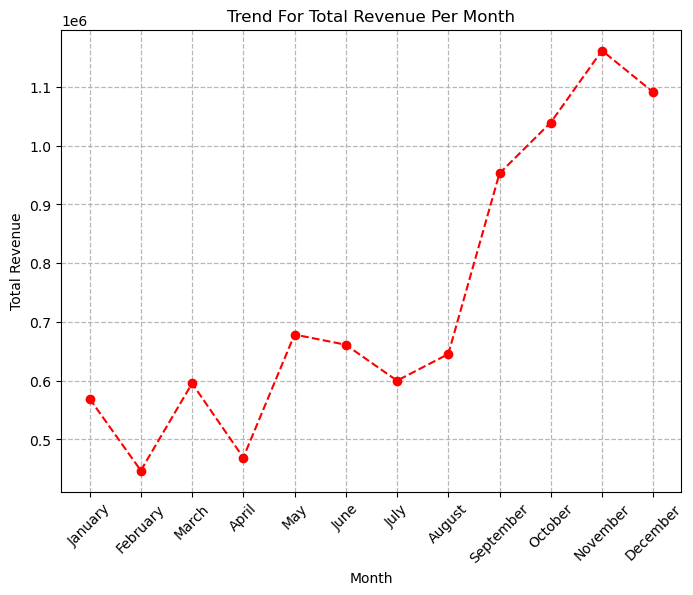

In [225]:
plt.figure(figsize=(8,6))
plt.plot(Total_revenue_per_Month["Month"],Total_revenue_per_Month["Revenue"], marker='o',linestyle='--',color='red' )
plt.title("Trend For Total Revenue Per Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True, which='both',linestyle='--',linewidth=0.9,alpha=0.9)
plt.xticks(rotation=45)
# plt.savefig("month.png")